In [7]:
import pandas as pd
import json
import os 
import requests
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [10]:

df_proposal=pd.read_csv('proposal_data.csv')
df_token=pd.read_csv('token_data.csv')
df_voter=pd.read_csv('voter_data.csv')
df_unique_voter=pd.read_csv('unique_voters.csv')
print(len(df_token))


C:\Users\skpat\AppData\Local\Temp\ipykernel_22876\18431638.py:2: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



960000


Most frequent proposers


The number of unique proposers is: 9


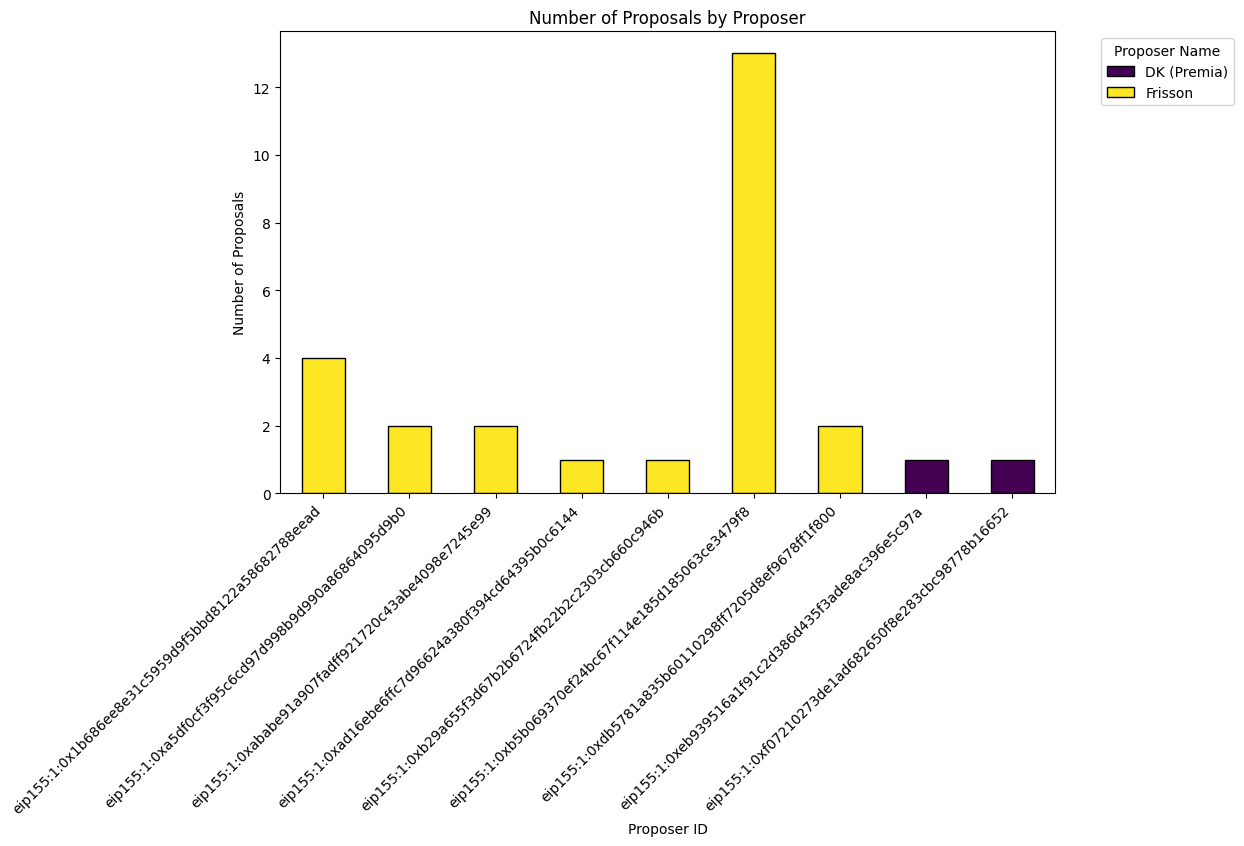

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_proposal_data.csv' with the actual path to your CSV file
csv_file_path = 'proposal_data.csv'

# Read the CSV file into a DataFrame
df = df_proposal

# Calculate the number of unique proposers
unique_proposers_count = df['proposer_id'].nunique()

print(f'The number of unique proposers is: {unique_proposers_count}')

# Group by proposer_id and count the number of proposals by each proposer
proposer_counts = df.groupby('proposer_id')['proposer_name'].value_counts().unstack(fill_value=0)

# Plot a bar chart
proposer_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title('Number of Proposals by Proposer')
plt.xlabel('Proposer ID')
plt.ylabel('Number of Proposals')
plt.legend(title='Proposer Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Check for missing names and label with proposer IDs
# for idx, col in enumerate(proposer_counts.columns):
#     if pd.isna(col[1]):
#         plt.text(idx, 0, col[0], ha='center', va='bottom', rotation=45, color='black', fontsize=8)

plt.show()


result for each proposal 


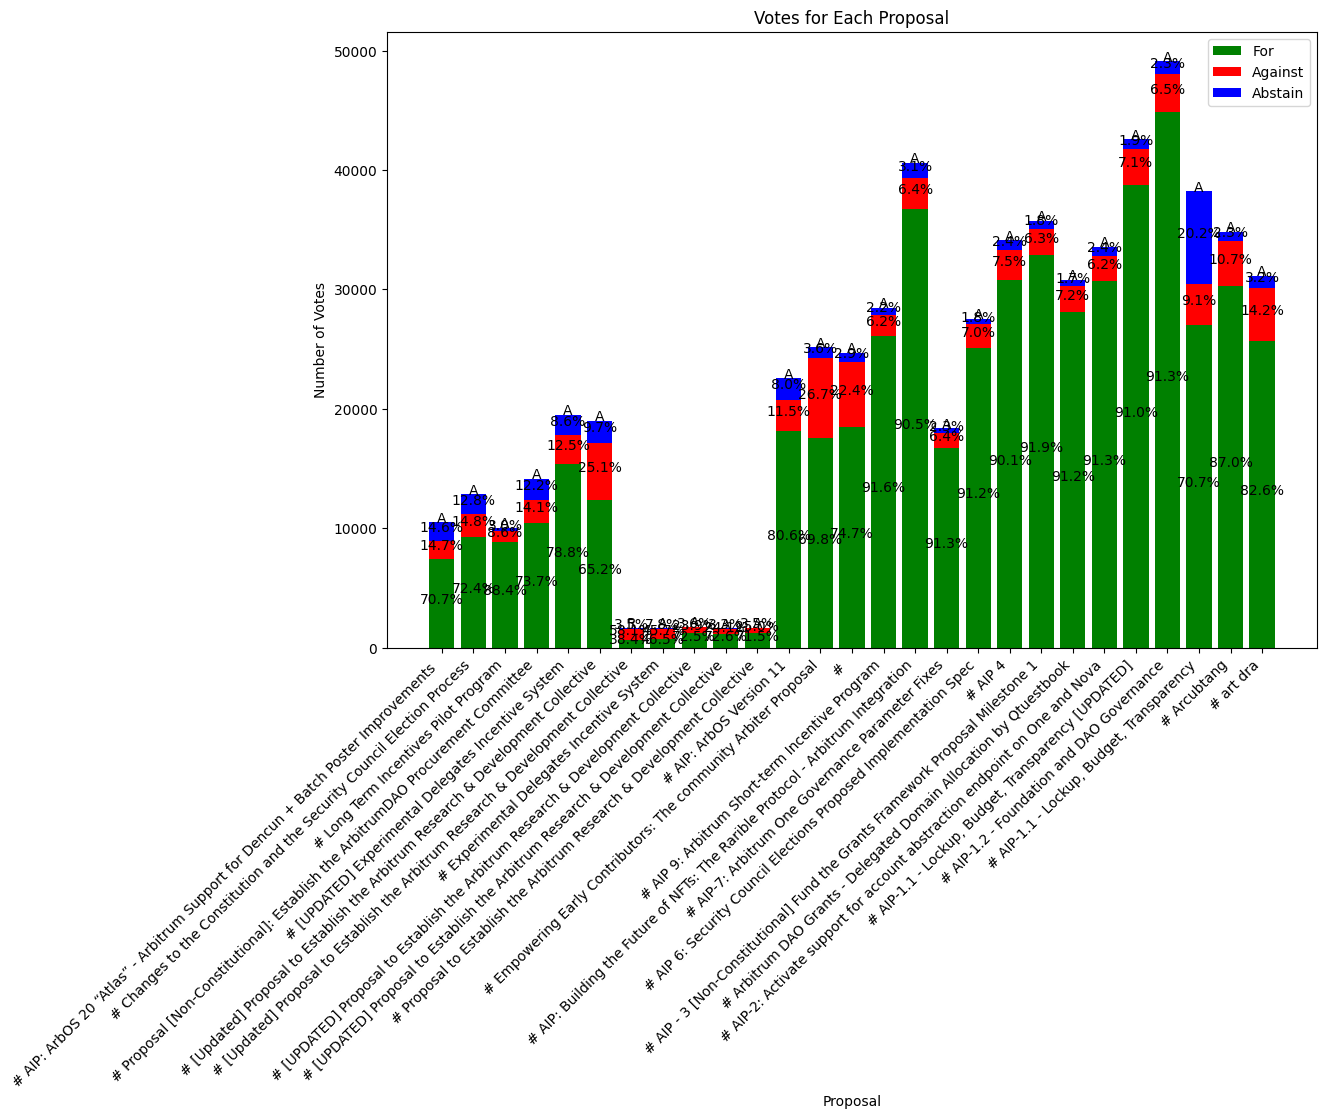

In [13]:

# Replace 'your_proposal_data.csv' with the actual path to your CSV file

# Read the CSV file into a DataFrame
df = df_proposal
# Calculate total votes for each proposal
df['total_votes'] = df['for_vote_count'] + df['against_vote_count'] + df['abstain_vote_count']

# Calculate percentage for each category
df['for_percentage'] = (df['for_vote_count'] / df['total_votes']) * 100
df['against_percentage'] = (df['against_vote_count'] / df['total_votes']) * 100
df['abstain_percentage'] = (df['abstain_vote_count'] / df['total_votes']) * 100

# Determine result based on vote counts
df['result'] = df.apply(lambda row: 'A' if row['for_vote_count'] > row['against_vote_count'] else 'R', axis=1)

# Plot the graph
plt.figure(figsize=(12, 8))

# Bar plot for votes
plt.bar(df.index, df['for_vote_count'], color='g', label='For')
plt.bar(df.index, df['against_vote_count'], bottom=df['for_vote_count'], color='r', label='Against')
plt.bar(df.index, df['abstain_vote_count'], bottom=df['for_vote_count'] + df['against_vote_count'], color='b', label='Abstain')

# Annotation with percentage and result
for i in range(len(df)):
    plt.text(i, df['for_vote_count'][i] / 2, f"{df['for_percentage'][i]:.1f}%", ha='center', color='black')
    plt.text(i, df['for_vote_count'][i] + df['against_vote_count'][i] / 2, f"{df['against_percentage'][i]:.1f}%", ha='center', color='black')
    plt.text(i, df['for_vote_count'][i] + df['against_vote_count'][i] + df['abstain_vote_count'][i] / 2, f"{df['abstain_percentage'][i]:.1f}%", ha='center', color='black')
    plt.text(i, df['total_votes'][i] + 10, df['result'][i], ha='center', color='black')

plt.xlabel('Proposal')
plt.ylabel('Number of Votes')
plt.title('Votes for Each Proposal')
plt.xticks(range(len(df)), df['title'], rotation=45, ha='right')
plt.legend()
plt.show()


Number of proposals for each governance id 


In [18]:
import pandas as pd

# Replace 'your_proposal_data.csv' with the actual path to your CSV file
csv_file_path = 'proposal_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Group by governor_id and count the number of proposals for each governor
proposals_by_governor = df.groupby('governance_id')['id'].count().reset_index()

# Rename the columns for clarity
proposals_by_governor.columns = ['Governance ID', 'Number of Proposals']

# Display the result
print(proposals_by_governor)


                                       Governance ID  Number of Proposals
0  eip155:42161:0x789fC99093B09aD01C34DC7251D0C89...                   14
1  eip155:42161:0xf07DeD9dC292157749B6Fd268E37DF6...                   13


List of voter and non voters on tally from all_token_holders


In [18]:
df_token_holders=df_token
df_unique_voter_data=df_unique_voter
unique_token_holder_addresses = df_token_holders['Holder.Address'].unique()
print("unique token holders cnt ",len(unique_token_holder_addresses))
unique_voter_addresses = df_unique_voter_data['voter.id'].unique()
print("unique voters cnt ",len(unique_voter_addresses))
# Filter the voter data table to include only rows where the voter address is in the unique token holder addresses
merged_df = pd.merge(df_token_holders, df_unique_voter_data, left_on='Holder.Address', right_on='voter.id', how='inner')

# Display or use the merged DataFrame as needed
print("number of voters with token holders  :",len(merged_df))


# Filter the token holders data to include only rows where the voter ID is not in the unique voter IDs
unique_voter_ids = set(df_unique_voter_data['voter.id'])
token_ids = set(df_token_holders['Holder.Address'])

missing_voters_df = df_unique_voter_data[~df_unique_voter_data['voter.id'].isin(token_ids)]

# Display or use the information as needed
print("Voters not having the tokens anymore:",len(missing_voters_df))

unique token holders cnt  934639
unique voters cnt  135426
number of voters with token holders  : 102449
Voters not having the tokens anymore: 34248
